In [1]:
#Importing Libraries
import tensorflow as tf
from tensorflow import keras
import tensorboard
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from random import shuffle
from sklearn.model_selection import train_test_split
import time
##Building Model
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, TimeDistributed,Dropout, Activation, Flatten,Conv2D, MaxPooling2D,LSTM,Bidirectional, Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import Input
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from Modle_Loading import Abnormal_Model

In [5]:
s=time.time()
model=keras.models.load_model("training")
e=time.time()
s-e

-22.830963134765625

In [6]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [7]:
from keras.models import model_from_json
s=time.time()
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
e=time.time()
e-s

2.6123578548431396

In [ ]:
import os
import ffmpeg
import sys
sys.path.append(r'C:\Users\Abdelrahman Ahmed\Downloads\ffmpeg-n4.4-latest-win64-gpl-4.4\bin')
for video_name in os.listdir("C:\\Users\\Abdelrahman Ahmed\\Downloads\\GraduationData"):
    video_path=os.path.join("C:\\Users\\Abdelrahman Ahmed\\Downloads\\GraduationData\\",video_name)
    stream=ffmpeg.input(video_path)
    stream=stream.filter("fps",fps=5,round="up")
    new_video_path=os.path.join("C:\\Users\\Abdelrahman Ahmed\\Downloads\\Modified_Graduationdata",video_name)
    stream=ffmpeg.output(stream,new_video_path)

    ffmpeg.run(stream)
    

    

In [71]:

from preprocessing import processing
model = Abnormal_Model('model.json', 'model.h5')
data=processing("static/NV0.mp4")
predictions=model.predict(np.expand_dims(data[20],axis=0))


c:\Users\Abdelrahman Ahmed\Downloads\finalproject\preprocessing.py:66: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset1.append(np.array([images1,np.array([1,0])]))


812


In [72]:
predictions

array([[9.762438e-01, 8.830726e-04]], dtype=float32)

In [69]:
data[0].shape

(10, 100, 100, 3)

In [82]:
def get_Frames(file_path):
    
    X_train=processing(file_path)
    predictions=loaded_model.predict(np.expand_dims(X_train[0],axis=0))
    
    cap=cv2.VideoCapture(file_path)
                
    success=True

    i=0
    counter=0
    predict_lables=predictions
    print(predict_lables)
    suc=[]
    n=0
    while (True):
        
        success,frame=cap.read()
        if not success:
            break
        suc.append(success)
        if counter==10:
            
            i+=1
            if len(predictions)==i:
                i-=1
            predict_lables=model.predict(np.expand_dims(X_train[i],axis=0))
            counter=0
      
        if (predict_lables[0][0] < predict_lables[0][1]) and (predict_lables[0][1]>.97):
            b="{:.2f}".format(predict_lables[0][1])
            frame=cv2.putText(frame,f"Abnormal Behaviour:  {b}",(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2)   
            print("Abnormal Behaviour with probability")

        else:
            c="{:.2f}".format(predict_lables[0][0])
            frame=cv2.putText(frame,f"Not Abnormal Behaviour: {c}",(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2)  
        counter+=1

        #yield (b'--frame\r\n'b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')
    
        

In [83]:
get_Frames("static/NV0.mp4")

812
[[9.8983872e-01 6.1124563e-04]]


In [4]:
cap=cv2.VideoCapture(os.path.join('Static/',"NV0"))


In [20]:
# Building Function that will read videos using opencv and save them as Dataframe on ##outs_dataFrames_Folder
img_size=100
def preprocessing(file_path):
    '''
    Reading the videos from a certain folders and get the frames to store them in another
    folder.

    Parameters:
        videos_folder (str):The folder path that contains the videos.

    Returns:
        None : only reading the videos   
    '''
    dataset1=[]
    images1=[]
    limit1=0
    count1=0

    num_frames=10
    c1=0

    
    cap=cv2.VideoCapture(file_path)
            
    success=True
    while success:
        success,image=cap.read()
        if not success:
            break
               
        image=cv2.resize(image,(img_size,img_size))
                
        c1+=1
            
        if image is not None:
            images1.append(np.array(image))
            limit1+=1
            count1+=1
            if limit1==num_frames:
                limit1=0
                dataset1.append(np.array([images1,np.array([1,0])]))
                images1=[]
    X_train = np.array([i[0] for i in dataset1]).reshape(-1, 10, img_size, img_size, 3)
    print(c1)
    return X_train

In [21]:
data=preprocessing("static/NV0.mp4")

<ipython-input-20-9a2fd585ab4c>:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset1.append(np.array([images1,np.array([1,0])]))


812


In [10]:
np.array(data).shape

(81, 10, 100, 100, 3)

In [12]:
len(data)

81

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 100, 100, 64)  1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 98, 98, 64)    36928     
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 49, 49, 64)   0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 47, 47, 64)    36928     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 10, 23, 23, 64)   0         
 3D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 21, 21, 64)    3

In [13]:
import time

start=time.time()
test_predictions=loaded_model.predict(data)
end=time.time()

print("time taken "+str(end-start))

time taken 24.81602191925049


In [14]:
len(test_predictions)

81

In [ ]:
def Check_Model(X_test,Test_Predictions,video_num=0):
    '''
    Check the accurcy of model by giving the test data versus the plotting frames.

    Parameters:
        X_test (np_array):frames of test data.
        Test_predictions (float): probability of predicted labels by model 

    Returns:
        None : only plotting the videos frames with model prediction label to test them.  
    '''
    
    
    try:
        assert video_num in range(0,X_test.shape[0]) 
    except:
        print("Enter values of video number between 0 to "+str(X_test.shape[0]))
    
    #plt.figure(figsize=(15,10))
    
    
    Violence=[]
    NViolence=[]
    V=0
    NV=0
    for i in range(len(test_predictions)):
        video_prediction=Test_Predictions[i]
        if (video_prediction[0]>video_prediction[1]) and (video_prediction[0]>.5):
            
            NViolence.append(i)
            NV+=1
            
        elif (video_prediction[0]<video_prediction[1]) and (video_prediction[1]>.5):
            V+=1
            Violence.append(i)
            
    print("Violence Length is "+str(V))
    print("NViolence Length is " +str(NV))
    
    return Violence,NViolence
    # for i in range(10):
    #     ax=plt.subplot(4,3,i+1)
    #     plt.imshow(X_test[video_num][i])
    #     ax.figure.set_size_inches(15,15)
 

In [ ]:
checking=Check_Model(data,test_predictions)

Violence Length is 246
NViolence Length is 108


In [ ]:
checking[0]

[0,
 4,
 5,
 6,
 9,
 10,
 11,
 12,
 15,
 16,
 17,
 20,
 23,
 24,
 29,
 33,
 36,
 55,
 56,
 57,
 58,
 62,
 72,
 73,
 74,
 75,
 78,
 79,
 80,
 81,
 95,
 96,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 107,
 108,
 114,
 115,
 118,
 120,
 131,
 132,
 133,
 147,
 148,
 151,
 152,
 153,
 154,
 155,
 156,
 167,
 174,
 182,
 187,
 188,
 189,
 190,
 192,
 193,
 194,
 195,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 212,
 215,
 216,
 217,
 218,
 219,
 220,
 222,
 223,
 224,
 225,
 226,
 227,
 231,
 233,
 248,
 249,
 254,
 255,
 258,
 266,
 267,
 269,
 272,
 281,
 282,
 283,
 285,
 286,
 287,
 290,
 307,
 313,
 314,
 318,
 323,
 327,
 328,
 329,
 334,
 336,
 337,
 338,
 339,
 340,
 342,
 344,
 346,
 347,
 348,
 349,
 350,
 351,
 353]

In [ ]:
def Check_Model_Plotting(X_test,Test_Predictions,video_num=0):
    '''
    Check the accurcy of model by giving the test data versus the plotting frames.

    Parameters:
        X_test (np_array):frames of test data.
        Test_predictions (float): probability of predicted labels by model 

    Returns:
        None : only plotting the videos frames with model prediction label to test them.  
    '''
    
    
    
    
    try:
        assert video_num in range(0,X_test.shape[0]) 
    except:
        print("Enter values of video number between 0 to "+str(X_test.shape[0]))
    
    plt.figure(figsize=(15,10))
    
    video_prediction=Test_Predictions[video_num]
    print(video_prediction)
    if video_prediction[0]>video_prediction[1]:
        print("This video is non violence with probability equal to "+str(video_prediction[0]))
    else:
        print("This video is violence with probability equal to "+str(video_prediction[1]))
    
    for i in range(10):
        ax=plt.subplot(4,3,i+1)
        plt.imshow(X_test[video_num][i])
        ax.figure.set_size_inches(15,15)
 

[0.78902924 0.8733053 ]
This video is violence with probability equal to 0.8733053


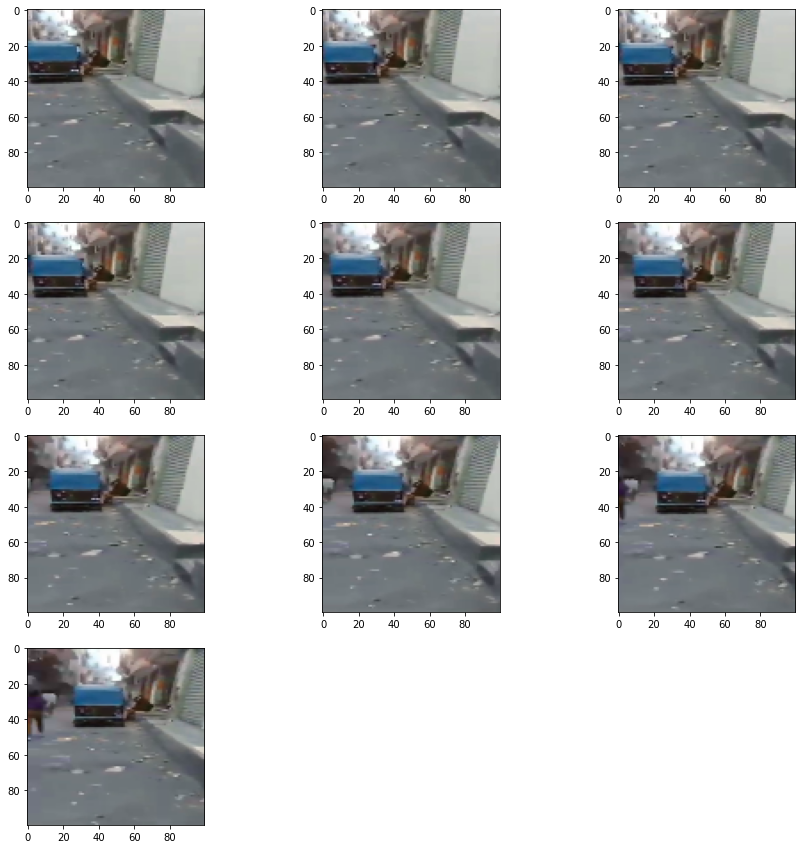

In [ ]:
Check_Model_Plotting(data,test_predictions,video_num=50)

## CV2  STreaming

In [22]:
import cv2

cap=cv2.VideoCapture(0)

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 800)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 800)
print(cap.isOpened())

a=0
images=[]
limit1=0
dataset1=[]
num_frames=10
img_size=100
while (cap.isOpened()):
    _,frame=cap.read()
    
    
    image=cv2.resize(frame,(100,100))
    

    if image is not None:
        images.append(np.array(image))
        limit1+=1
        if limit1==num_frames:
            limit1=0
            dataset1.append(np.array([images,np.array([1,0])]))
    
    if len(dataset1)==1:
        
        X_train = np.array([i[0] for i in dataset1]).reshape(-1, 10, img_size, img_size, 3)
        print(X_train.shape)
        predict_lables=model.predict(X_train)
        print(len(predict_lables))
        print(predict_lables[0][0])
        print(predict_lables[0][1])
    
    if a>10:
        if (predict_lables[0][0] < predict_lables[0][1]) and (predict_lables[0][1]>.9):
            b="{:.2f}".format(predict_lables[0][1])
            frame=cv2.putText(frame,f"Abnormal Behaviour:  {b}",(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2)   
            print("Abnormal Behaviour with probability")

        else:
            c="{:.2f}".format(predict_lables[0][0])
            frame=cv2.putText(frame,f"Not Abnormal Behaviour: {c}",(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2)  
    a+=1 
    
        
    cv2.imshow("img",frame)
    
    if len(images)==10:
        images=[]
        dataset1=[]
    
    if cv2.waitKey(1)==ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

True


<ipython-input-22-0ae42f20ac64>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset1.append(np.array([images,np.array([1,0])]))


(1, 10, 100, 100, 3)
1
0.28852233
0.6120857
(1, 10, 100, 100, 3)
1
0.35867172
0.69399154
(1, 10, 100, 100, 3)
1
0.28778717
0.86215794
(1, 10, 100, 100, 3)
1
0.47163865
0.7325735
(1, 10, 100, 100, 3)
1
0.47099996
0.7028739
(1, 10, 100, 100, 3)
1
0.46910957
0.7021341
(1, 10, 100, 100, 3)
1
0.47116598
0.70913136
(1, 10, 100, 100, 3)
1
0.47912621
0.6948429
(1, 10, 100, 100, 3)
1
0.47899935
0.69268256
(1, 10, 100, 100, 3)
1
0.47867194
0.6941601
(1, 10, 100, 100, 3)
1
0.47171855
0.6945172
(1, 10, 100, 100, 3)
1
0.483609
0.6985386
(1, 10, 100, 100, 3)
1
0.48481268
0.70129335
(1, 10, 100, 100, 3)
1
0.48227566
0.70186
(1, 10, 100, 100, 3)
1
0.43999946
0.80593646
(1, 10, 100, 100, 3)
1
0.24896395
0.93700266
Abnormal Behaviour with probability
Abnormal Behaviour with probability
Abnormal Behaviour with probability
Abnormal Behaviour with probability
Abnormal Behaviour with probability
Abnormal Behaviour with probability
Abnormal Behaviour with probability
Abnormal Behaviour with probability
Abnor

In [25]:
## Video_Streaming